# 认识数据

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 原始数据

In [4]:
df = pd.read_csv(r'D:\ProgrammingProjects\MatlabProjects\ZC_codes\DataWN.txt', delimiter='\t')
df.head()

,581.258516793787,583.37514892091,585.49126753438,587.606872810375,589.721964924986,591.836544054237,593.95061037405,596.064164060292,598.177205288728,600.289734235063,...,3003.96222064873,3005.52481426769,3007.08707229862,3008.64899484156,3010.21058199655,3011.77183386358,3013.33275054258,3014.89333213347,3016.45357873609,Unnamed: 1340
0,2,4,310,357,364,362,353,338,350,358,...,352,322,326,337,330,338,334,322,348,NaN
1,10,9,338,374,346,357,352,369,347,358,...,309,326,331,340,335,330,312,327,338,NaN
2,6,10,354,350,337,356,344,357,367,352,...,318,327,331,330,319,319,335,325,329,NaN
3,6,7,365,353,334,347,350,351,352,348,...,315,327,318,326,313,324,328,315,339,NaN
4,6,5,361,346,363,348,325,360,357,346,...,324,330,328,310,314,311,318,309,324,NaN


In [14]:
D = df.iloc[:, 0:-1].to_numpy()

In [6]:
wave = df.columns[:-1].to_numpy()
for i in range(wave.shape[0]):
    wave[i] = eval(wave[i])

In [7]:
for index, temp in enumerate(wave):
    print(index, temp)

0 581.258516793787
1 583.37514892091
2 585.49126753438
3 587.606872810375
4 589.721964924986
5 591.836544054237
6 593.95061037405
7 596.064164060292
8 598.177205288728
9 600.289734235063
10 602.401751074896
11 604.51325598378
12 606.624249137156
13 608.734730710406
14 610.84470087881
15 612.954159817589
16 615.063107701884
17 617.171544706744
18 619.279471007139
19 621.386886777971
20 623.493792194051
21 625.600187430107
22 627.7060726608
23 629.811448060715
24 631.916313804333
25 634.020670066082
26 636.124517020293
27 638.227854841225
28 640.330683703058
29 642.433003779886
30 644.534815245737
31 646.636118274546
32 648.736913040175
33 650.837199716407
34 652.936978476948
35 655.036249495417
36 657.135012945364
37 659.233269000251
38 661.331017833461
39 663.428259618315
40 665.52499452803
41 667.621222735765
42 669.716944414587
43 671.812159737492
44 673.906868877395
45 676.001072007126
46 678.094769299449
47 680.187960927044
48 682.280647062507
49 684.37282787836
50 686.464503547049

1145 2707.37246468103
1146 2708.99926207708
1147 2710.62570456244
1148 2712.25179224488
1149 2713.87752523216
1150 2715.50290363196
1151 2717.12792755195
1152 2718.75259709973
1153 2720.37691238289
1154 2722.00087350893
1155 2723.62448058535
1156 2725.24773371959
1157 2726.87063301903
1158 2728.49317859103
1159 2730.11537054291
1160 2731.73720898191
1161 2733.35869401528
1162 2734.97982575018
1163 2736.60060429376
1164 2738.2210297531
1165 2739.84110223526
1166 2741.46082184724
1167 2743.08018869601
1168 2744.69920288848
1169 2746.31786453154
1170 2747.93617373201
1171 2749.5541305967
1172 2751.17173523235
1173 2752.78898774565
1174 2754.40588824329
1175 2756.02243683187
1176 2757.63863361797
1177 2759.25447870814
1178 2760.86997220885
1179 2762.48511422655
1180 2764.09990486766
1181 2765.71434423854
1182 2767.32843244549
1183 2768.94216959481
1184 2770.55555579272
1185 2772.16859114543
1186 2773.78127575907
1187 2775.39360973975
1188 2777.00559319353
1189 2778.61722622645
1190 2780.22

### 平均光谱

In [11]:
def Spec(data, wave=wave):
    plt.figure()
    plt.plot(wave, data.mean(0))
    plt.xlabel('Wavenumber($\mathregular{cm^{-1}}$)')
    plt.ylabel('Int(a.u.)')
    plt.title('Mean Spectrum')

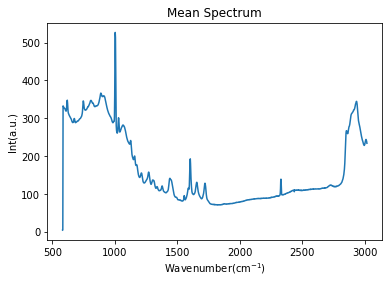

In [16]:
Spec(D)

### 2900CM<sup>-1</sup>处成像

In [67]:
def Img2900(data, wn=1265, D=400):  #   1265  :  2900cm-1 
    plt.figure()
    plt.imshow(data[:, wn].reshape(-1, D))

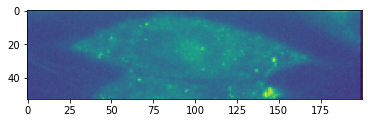

In [68]:
Img2900(data=D, D=200)

### 全波数成像

In [75]:
def ImgAll(data, D=400, output=0):
    img = np.zeros(data.shape[0])
    for i in range(data.shape[1]):
        temp = data[:, i]
        img += temp
    plt.figure()
    plt.imshow(img.reshape(-1, D))#   1265  :  2900cm-1 
    
    if output:
        return img

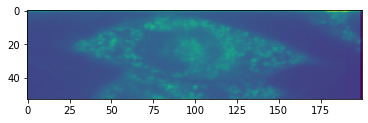

In [76]:
ImgAll(D, D=200)

# K-Means 聚类

## PCA

In [124]:
from sklearn.decomposition import PCA

In [231]:
pca = PCA(0.9)
data = pca.fit_transform(D)
data = pca.inverse_transform(data)

## 选取合适的K值

In [232]:
from sklearn.cluster import KMeans

In [233]:
data.shape

(10600, 1340)

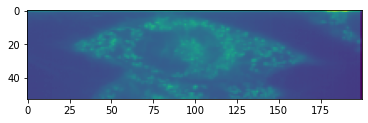

In [244]:
img = ImgAll(data, D=200, output=1).reshape(-1, 200)
# img = data[:,81].reshape(-1, 200)
row, col = img.shape

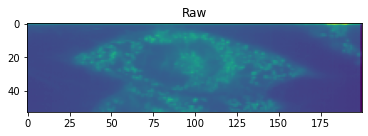

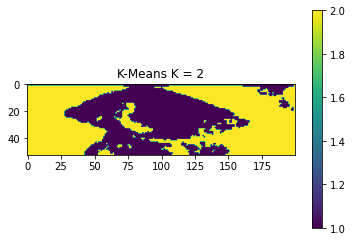

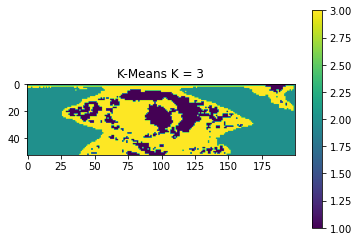

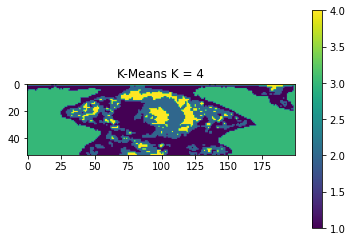

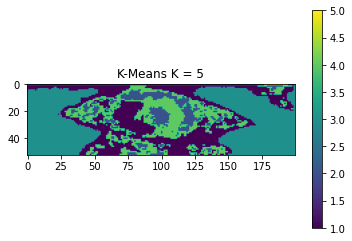

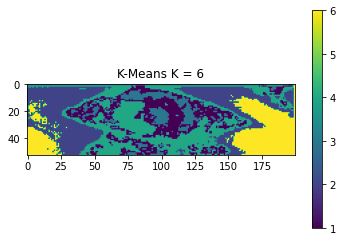

In [245]:
plt.figure()
plt.imshow(img.reshape(row, col))
plt.title('Raw')
species = 6
for k in range(2, species+1):
    #setting clusers(聚类中心)
    label = KMeans(n_clusters=k).fit_predict(img.reshape(-1, 1))
    #get the label of each pixel
    label = label.reshape(row, col)
    #according to the label to add the pixel
    temp = np.zeros((row, col))
    for i in range(row):
         for j in range(col):
             temp[i][j] = int((label[i][j]+1))
    temp = temp.reshape(row, col)
    
    plt.figure()
    plt.imshow(temp)
    plt.title('K-Means K = %d' %k)
    plt.colorbar()

## 不同类成像和与之相应的光谱

In [246]:
def species_img_and_spec(RawData, ImgData, class_no=1):
    plt.figure()
    plt.imshow(np.where(ImgData == class_no, ImgData, -1))
    plt.title('Img of %d th Species' %class_no)
    plt.colorbar()
    temp = ImgData.reshape(-1, 1).flatten()
    ind = np.where(temp == class_no)
    ind = ind[0]
    temp2 = np.zeros((RawData.shape[0], ind.shape[0]))
    for i in range(ind.shape[0]):
        temp2[:, i] = RawData[:, ind[i]]
        
    plt.figure()   
    plt.plot(wave, temp2.mean(1))
    plt.title('Spec of %d th Species' %class_no)
    plt.xlabel('Wavenumber($\mathregular{cm^{-1}}$)')
#     plt.ylim(0, 700)
    return temp2.mean(1)

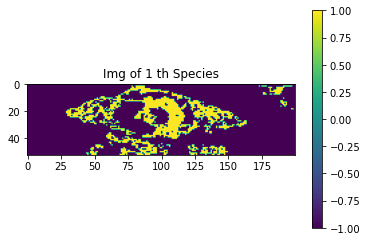

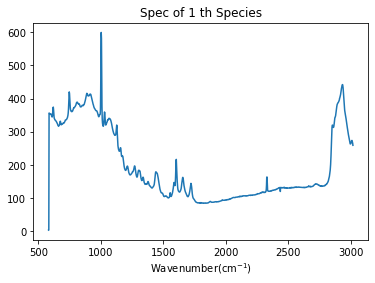

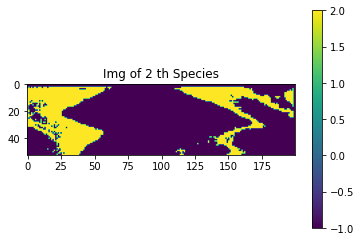

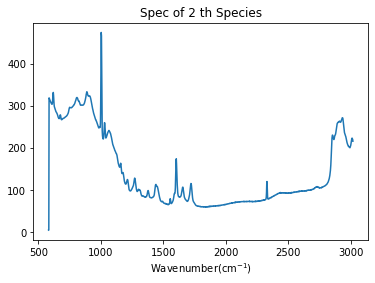

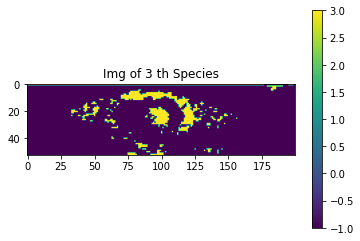

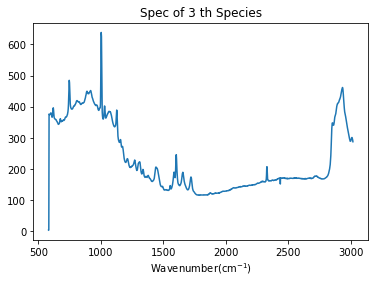

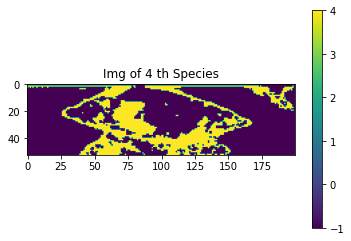

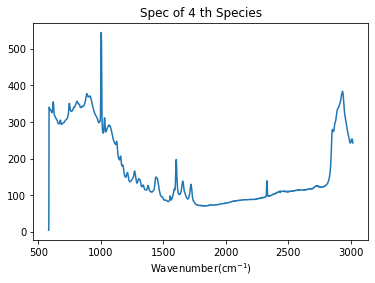

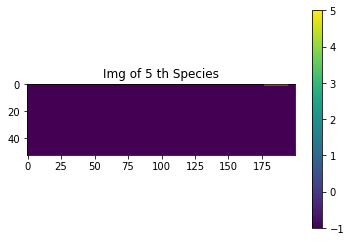

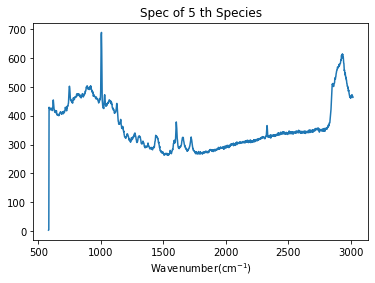

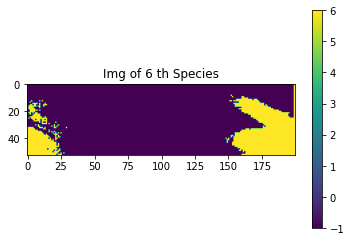

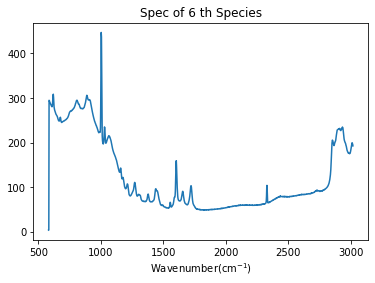

In [247]:
spec_set = []
for i in range(1, species+1):
    spec = species_img_and_spec(D.T, temp, class_no=i)
    spec_set.append(spec)

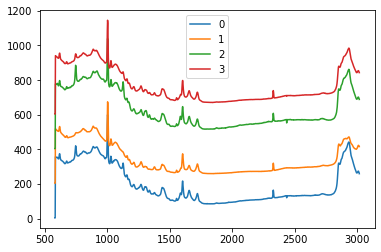

In [253]:
for i in [0,1,2,3,]:
    plt.plot(wave, spec_set[i] + i * 200, label=i)
    plt.legend()